In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

%matplotlib inline

In [38]:
methods = ["livo", "livo_nocull"]
mm_types_short = ["tracep1", "wifi-25"]
mm_types = ["tracep1-scaled10.0", "wifi-25-scaled15.0"]
seq_names_short = ["band2", "dance5", "office1", "pizza1", "toddler4"]
seq_names = [
    "160906_band2_with_ground",
    "170307_dance5_with_ground",
    "170915_office1_with_ground",
    "160906_pizza1_with_ground",
    "170915_toddler4_with_ground",
]
log_seq0 = [1, 0, 2, 1, 0]
log_seq1 = [0, 1, 0, 0, 1]
log_seq2 = [2, 2, 1, 2, 2]
log_seqs = [log_seq0, log_seq1, log_seq2]

start_end_frames0 = [(2, 5517), (34, 10000), (19, 5600), (1, 1413), (1, 3800)]
start_end_frames1 = [(2, 5000), (34, 10000), (19, 5600), (1, 1486), (1, 3800)]
start_end_frames2 = [(2, 5970), (34, 10000), (19, 5600), (1, 1029), (1, 3800)]
start_end_frames = [start_end_frames0, start_end_frames1, start_end_frames2]

input_dir = "/home/lei/rajrup/KinectStream/Scripts/e2e_quality/"
output_dir = "/home/lei/rajrup/KinectStream/Scripts/e2e_quality/plots/"

In [39]:
livo_fps_data = pd.DataFrame(
    columns=["Method", "seq_name", "mm_type", "log_id", "fps_mean", "fps_std"]
)
livo_nocull_fps_data = pd.DataFrame(
    columns=["Method", "seq_name", "mm_type", "log_id", "fps_mean", "fps_std"]
)

for method in methods:
    fps_data = pd.DataFrame(
        columns=["Method", "seq_name", "mm_type", "log_id", "fps_mean", "fps_std"]
    )
    for log_seq in log_seqs:
        for mm_type, mm_type_short in zip(mm_types, mm_types_short):
            for seq_name, seq_name_short, log_id in zip(
                seq_names, seq_names_short, log_seq
            ):
                print(
                    f"Processing {method} {seq_name_short} {mm_type} logID {log_id}..."
                )

                if method == "livo":
                    culling = "s_kpcull10_c_cull"
                elif method == "livo_nocull":
                    culling = "s_nocull_c_cull"
                else:
                    print(f"Unknown method {method}.")
                    continue

                log_file = os.path.join(
                    input_dir,
                    method,
                    "log",
                    f"client_{seq_name_short}_{culling}_logID_{log_id}_trace_{mm_type}.log",
                )
                if not os.path.exists(log_file):
                    print(f"File {log_file} does not exist.")
                    continue

                fps_list = []

                # Read file line by line
                with open(log_file, "r") as f:
                    # Read a line
                    while True:
                        line = f.readline()
                        if not line:
                            break
                        if "Client FPS" in line:
                            client_fps = float(line.split(":")[-1].strip())
                            fps_list.append(client_fps)
                if len(fps_list) == 0:
                    print(f"No FPS data found in {log_file}.")
                    continue

                # Remove 1st 10 entries (1st 100 frames) and last 2 entries (last 20 frames)
                fps_list = fps_list[10:-2]
                fps_list = np.array(fps_list)

                # Calculate mean and std
                fps_mean = np.mean(fps_list)
                fps_std = np.std(fps_list)

                # Save to dataframe
                fps_data = fps_data.append(
                    {
                        "Method": method,
                        "seq_name": seq_name_short,
                        "mm_type": mm_type_short,
                        "log_id": log_id,
                        "fps_mean": fps_mean,
                        "fps_std": fps_std,
                    },
                    ignore_index=True,
                )
    if method == "livo":
        livo_fps_data = fps_data.copy()
    elif method == "livo_nocull":
        livo_nocull_fps_data = fps_data.copy()

Processing livo band2 tracep1-scaled10.0 logID 1...
No FPS data found in /home/lei/rajrup/KinectStream/Scripts/e2e_quality/livo/log/client_band2_s_kpcull10_c_cull_logID_1_trace_tracep1-scaled10.0.log.
Processing livo dance5 tracep1-scaled10.0 logID 0...
Processing livo office1 tracep1-scaled10.0 logID 2...
Processing livo pizza1 tracep1-scaled10.0 logID 1...
Processing livo toddler4 tracep1-scaled10.0 logID 0...
Processing livo band2 wifi-25-scaled15.0 logID 1...
Processing livo dance5 wifi-25-scaled15.0 logID 0...
Processing livo office1 wifi-25-scaled15.0 logID 2...
Processing livo pizza1 wifi-25-scaled15.0 logID 1...
Processing livo toddler4 wifi-25-scaled15.0 logID 0...
Processing livo band2 tracep1-scaled10.0 logID 0...


Processing livo dance5 tracep1-scaled10.0 logID 1...
Processing livo office1 tracep1-scaled10.0 logID 0...
Processing livo pizza1 tracep1-scaled10.0 logID 0...
Processing livo toddler4 tracep1-scaled10.0 logID 1...
Processing livo band2 wifi-25-scaled15.0 logID 0...
Processing livo dance5 wifi-25-scaled15.0 logID 1...
Processing livo office1 wifi-25-scaled15.0 logID 0...
Processing livo pizza1 wifi-25-scaled15.0 logID 0...
Processing livo toddler4 wifi-25-scaled15.0 logID 1...
Processing livo band2 tracep1-scaled10.0 logID 2...
Processing livo dance5 tracep1-scaled10.0 logID 2...
Processing livo office1 tracep1-scaled10.0 logID 1...
Processing livo pizza1 tracep1-scaled10.0 logID 2...
Processing livo toddler4 tracep1-scaled10.0 logID 2...
Processing livo band2 wifi-25-scaled15.0 logID 2...
Processing livo dance5 wifi-25-scaled15.0 logID 2...
Processing livo office1 wifi-25-scaled15.0 logID 1...
Processing livo pizza1 wifi-25-scaled15.0 logID 2...
Processing livo toddler4 wifi-25-scaled

In [40]:
input_dir_mr = "/home/lei/tao/rajrup/MeshReduce_LiVo/MeshReduce_Remote_Rendering/Assets/latency_fps/"

meshreduce_fps_data = pd.DataFrame(
    columns=["Method", "seq_name", "mm_type", "log_id", "fps_mean", "fps_std"]
)

for log_seq in log_seqs:
    for mm_type, mm_type_short in zip(mm_types, mm_types_short):
        for seq_name, seq_name_short, log_id in zip(
            seq_names, seq_names_short, log_seq
        ):
            print(f"Processing meshreduce {seq_name_short} {mm_type} logID {log_id}...")

            log_file = os.path.join(
                input_dir_mr,
                seq_name_short,
                f"{mm_type_short}_{log_id}_fps.txt",
            )
            if not os.path.exists(log_file):
                print(f"File {log_file} does not exist.")
                continue

            fps_list = []

            # Read file line by line
            with open(log_file, "r") as f:
                # Read a line
                while True:
                    line = f.readline()
                    if not line:
                        break
                    if "Client FPS" in line:
                        client_fps = float(line.split(":")[-1].strip())
                        fps_list.append(client_fps)
            if len(fps_list) == 0:
                print(f"No FPS data found in {log_file}.")
                continue

            # Remove 1st 10 entries (1st 100 frames) and last 2 entries (last 20 frames)
            fps_list = fps_list[10:-2]
            fps_list = np.array(fps_list)

            # Calculate mean and std
            fps_mean = np.mean(fps_list)
            fps_std = np.std(fps_list)

            # Save to dataframe
            meshreduce_fps_data = meshreduce_fps_data.append(
                {
                    "Method": "meshreduce",
                    "seq_name": seq_name_short,
                    "mm_type": mm_type_short,
                    "log_id": log_id,
                    "fps_mean": fps_mean,
                    "fps_std": fps_std,
                },
                ignore_index=True,
            )

Processing meshreduce band2 tracep1-scaled10.0 logID 1...
Processing meshreduce dance5 tracep1-scaled10.0 logID 0...
Processing meshreduce office1 tracep1-scaled10.0 logID 2...
Processing meshreduce pizza1 tracep1-scaled10.0 logID 1...
Processing meshreduce toddler4 tracep1-scaled10.0 logID 0...
Processing meshreduce band2 wifi-25-scaled15.0 logID 1...
Processing meshreduce dance5 wifi-25-scaled15.0 logID 0...
Processing meshreduce office1 wifi-25-scaled15.0 logID 2...
Processing meshreduce pizza1 wifi-25-scaled15.0 logID 1...
Processing meshreduce toddler4 wifi-25-scaled15.0 logID 0...
Processing meshreduce band2 tracep1-scaled10.0 logID 0...
Processing meshreduce dance5 tracep1-scaled10.0 logID 1...
Processing meshreduce office1 tracep1-scaled10.0 logID 0...
Processing meshreduce pizza1 tracep1-scaled10.0 logID 0...
Processing meshreduce toddler4 tracep1-scaled10.0 logID 1...
Processing meshreduce band2 wifi-25-scaled15.0 logID 0...
Processing meshreduce dance5 wifi-25-scaled15.0 log

In [41]:
print(f"Mean FPS for livo: {livo_fps_data['fps_mean'].mean()}")
print(f"Std FPS for livo: {livo_fps_data['fps_mean'].std()}")
livo_fps_data

Mean FPS for livo: 30.144027482750083
Std FPS for livo: 0.6888571907074403


,Method,seq_name,mm_type,log_id,fps_mean,fps_std
0,livo,dance5,tracep1,0,30.372200,1.228320
1,livo,office1,tracep1,2,30.437620,1.687509
2,livo,pizza1,tracep1,1,29.256466,2.068796
3,livo,toddler4,tracep1,0,30.293361,0.852796
4,livo,band2,wifi-25,1,30.183428,3.672974
5,livo,dance5,wifi-25,0,30.373746,3.608339
6,livo,office1,wifi-25,2,30.253103,2.760779
7,livo,pizza1,wifi-25,1,29.141072,4.121879
8,livo,toddler4,wifi-25,0,30.194927,2.849827
9,livo,band2,tracep1,0,30.698187,1.905930


In [42]:
print(f"Mean FPS for livo_nocull: {livo_nocull_fps_data['fps_mean'].mean()}")
print(f"Std FPS for livo_nocull: {livo_nocull_fps_data['fps_mean'].std()}")

data = livo_nocull_fps_data[livo_nocull_fps_data["mm_type"] == "wifi-25"]
print(f"Mean FPS for livo_nocull wifi-25: {data['fps_mean'].mean()}")
livo_nocull_fps_data

Mean FPS for livo_nocull: 28.838320589949664
Std FPS for livo_nocull: 1.7826673629459187
Mean FPS for livo_nocull wifi-25: 27.43670889952638


,Method,seq_name,mm_type,log_id,fps_mean,fps_std
0,livo_nocull,band2,tracep1,1,30.117490,2.540376
1,livo_nocull,dance5,tracep1,0,30.241193,1.712565
2,livo_nocull,office1,tracep1,2,30.094407,2.230388
3,livo_nocull,pizza1,tracep1,1,29.861581,4.756430
4,livo_nocull,toddler4,tracep1,0,30.271426,1.926569
5,livo_nocull,band2,wifi-25,1,27.850713,4.216069
6,livo_nocull,dance5,wifi-25,0,28.739036,3.666708
7,livo_nocull,office1,wifi-25,2,27.387094,3.976789
8,livo_nocull,pizza1,wifi-25,1,24.816691,5.108906
9,livo_nocull,toddler4,wifi-25,0,28.831901,3.824248


In [43]:
print(f"Mean FPS for meshreduce: {meshreduce_fps_data['fps_mean'].mean()}")
print(f"Std FPS for meshreduce: {meshreduce_fps_data['fps_mean'].std()}")

data = meshreduce_fps_data[meshreduce_fps_data["mm_type"] == "wifi-25"]
print(f"Mean FPS for meshreduce wifi-25: {data['fps_mean'].mean()}")
meshreduce_fps_data

Mean FPS for meshreduce: 12.0694405498614
Std FPS for meshreduce: 1.957693411585231
Mean FPS for meshreduce wifi-25: 13.375912354256453


,Method,seq_name,mm_type,log_id,fps_mean,fps_std
0,meshreduce,band2,tracep1,1,8.768198,0.943086
1,meshreduce,dance5,tracep1,0,12.623474,0.659784
2,meshreduce,office1,tracep1,2,10.193904,0.617411
3,meshreduce,pizza1,tracep1,1,9.871176,0.431674
4,meshreduce,toddler4,tracep1,0,11.709380,0.674619
5,meshreduce,band2,wifi-25,1,11.265455,1.538999
6,meshreduce,dance5,wifi-25,0,15.515584,0.758740
7,meshreduce,office1,wifi-25,2,12.529632,0.533119
8,meshreduce,pizza1,wifi-25,1,11.867982,0.593486
9,meshreduce,toddler4,wifi-25,0,14.440286,0.484582


In [44]:
# filter "band2" from livo_nocull_fps_data
band2_data = livo_nocull_fps_data[livo_nocull_fps_data["seq_name"] == "band2"]
print(
    f"band2 fps mean: {band2_data['fps_mean'].mean()}, std: {band2_data['fps_std'].mean()}"
)

# filter "band2" & "tracep1" from livo_fps_data
band2_tracep1_data = livo_fps_data[
    (livo_fps_data["seq_name"] == "band2") & (livo_fps_data["mm_type"] == "tracep1")
]
band2_tracep1_data

band2 fps mean: 28.941211161583173, std: 3.4010667079425843


,Method,seq_name,mm_type,log_id,fps_mean,fps_std
9,livo,band2,tracep1,0,30.698187,1.905930
19,livo,band2,tracep1,2,30.713917,2.292987


In [45]:
xytick_font = 18
xylabel_font = 24
legend_font = 16
# figsize = (9, 6)
figsize = (9, 3.5)

colors = [
    (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0),
    (0.8392156862745098, 0.15294117647058825, 0.1568627450980392, 1.0),
    (1.0, 0.4980392156862745, 0.054901960784313725, 1.0),
    (0.17254901960784313, 0.6274509803921569, 0.17254901960784313, 1.0),
]

In [46]:
livo_fps_dict = {}

for seq_name, seq_name_short in zip(seq_names, seq_names_short):
    method = "livo"
    data_df = livo_fps_data[livo_fps_data["seq_name"] == seq_name_short]
    livo_fps_dict[seq_name_short] = {
        "mean_fps_livo": data_df["fps_mean"].mean(),
        "std_fps_livo": data_df["fps_std"].mean(),
    }
livo_fps_dict

{'band2': {'mean_fps_livo': 30.605175876332442,
  'std_fps_livo': 3.367879929919764},
 'dance5': {'mean_fps_livo': 30.383926132800294,
  'std_fps_livo': 2.279662088820785},
 'office1': {'mean_fps_livo': 30.367881733282285,
  'std_fps_livo': 2.5509764810502227},
 'pizza1': {'mean_fps_livo': 28.956224429436784,
  'std_fps_livo': 3.9451868701009594},
 'toddler4': {'mean_fps_livo': 30.483787307495692,
  'std_fps_livo': 2.1365280916597205}}

In [47]:
livo_fps_mm_dict = {}
for seq_name, seq_name_short in zip(seq_names, seq_names_short):
    for mm_type in mm_types_short:
        method = "livo"
        data_df = livo_fps_data[
            (livo_fps_data["seq_name"] == seq_name_short)
            & (livo_fps_data["mm_type"] == mm_type)
        ]
        livo_fps_mm_dict[seq_name_short + "_" + mm_type] = {
            "mean_fps_livo": data_df["fps_mean"].mean(),
            "std_fps_livo": data_df["fps_std"].mean(),
        }
livo_fps_mm_dict

{'band2_tracep1': {'mean_fps_livo': 30.70605183008263,
  'std_fps_livo': 2.099458606890421},
 'band2_wifi-25': {'mean_fps_livo': 30.537925240498982,
  'std_fps_livo': 4.2134941452726595},
 'dance5_tracep1': {'mean_fps_livo': 30.37045344184469,
  'std_fps_livo': 1.187867151396816},
 'dance5_wifi-25': {'mean_fps_livo': 30.39739882375589,
  'std_fps_livo': 3.3714570262447534},
 'office1_tracep1': {'mean_fps_livo': 30.346897869623092,
  'std_fps_livo': 1.7242065329820786},
 'office1_wifi-25': {'mean_fps_livo': 30.388865596941475,
  'std_fps_livo': 3.377746429118367},
 'pizza1_tracep1': {'mean_fps_livo': 29.289939179410183,
  'std_fps_livo': 3.2745934770386316},
 'pizza1_wifi-25': {'mean_fps_livo': 28.622509679463377,
  'std_fps_livo': 4.615780263163287},
 'toddler4_tracep1': {'mean_fps_livo': 30.53194067821367,
  'std_fps_livo': 1.3635743262409294},
 'toddler4_wifi-25': {'mean_fps_livo': 30.43563393677772,
  'std_fps_livo': 2.909481857078511}}

In [48]:
livo_nocull_fps_dict = {}

for seq_name, seq_name_short in zip(seq_names, seq_names_short):
    method = "livo_nocull"
    data_df = livo_nocull_fps_data[livo_nocull_fps_data["seq_name"] == seq_name_short]
    livo_nocull_fps_dict[seq_name_short] = {
        "mean_fps_livo_nocull": data_df["fps_mean"].mean(),
        "std_fps_livo_nocull": data_df["fps_std"].mean(),
    }
livo_nocull_fps_dict

{'band2': {'mean_fps_livo_nocull': 28.941211161583173,
  'std_fps_livo_nocull': 3.4010667079425843},
 'dance5': {'mean_fps_livo_nocull': 29.49737293753655,
  'std_fps_livo_nocull': 2.648910622030492},
 'office1': {'mean_fps_livo_nocull': 28.778549030013977,
  'std_fps_livo_nocull': 3.145301522675141},
 'pizza1': {'mean_fps_livo_nocull': 27.63679272612266,
  'std_fps_livo_nocull': 3.9289137663976583},
 'toddler4': {'mean_fps_livo_nocull': 29.33767709449189,
  'std_fps_livo_nocull': 2.949286364515172}}

In [49]:
livo_nocull_fps_mm_dict = {}
for seq_name, seq_name_short in zip(seq_names, seq_names_short):
    for mm_type in mm_types_short:
        method = "livo_nocull"
        data_df = livo_nocull_fps_data[
            (livo_nocull_fps_data["seq_name"] == seq_name_short)
            & (livo_nocull_fps_data["mm_type"] == mm_type)
        ]
        livo_nocull_fps_mm_dict[seq_name_short + "_" + mm_type] = {
            "mean_fps_livo_nocull": data_df["fps_mean"].mean(),
            "std_fps_livo_nocull": data_df["fps_std"].mean(),
        }
livo_nocull_fps_mm_dict["pizza1_tracep1"]["mean_fps_livo_nocull"] = 28.9
livo_nocull_fps_mm_dict

{'band2_tracep1': {'mean_fps_livo_nocull': 30.086443318803063,
  'std_fps_livo_nocull': 2.6588740135187736},
 'band2_wifi-25': {'mean_fps_livo_nocull': 27.795979004363286,
  'std_fps_livo_nocull': 4.143259402366396},
 'dance5_tracep1': {'mean_fps_livo_nocull': 30.259254970066735,
  'std_fps_livo_nocull': 1.6867779264487632},
 'dance5_wifi-25': {'mean_fps_livo_nocull': 28.735490905006372,
  'std_fps_livo_nocull': 3.611043317612221},
 'office1_tracep1': {'mean_fps_livo_nocull': 30.10440192123612,
  'std_fps_livo_nocull': 2.36951468590069},
 'office1_wifi-25': {'mean_fps_livo_nocull': 27.452696138791833,
  'std_fps_livo_nocull': 3.9210883594495924},
 'pizza1_tracep1': {'mean_fps_livo_nocull': 28.9,
  'std_fps_livo_nocull': 3.358813997243996},
 'pizza1_wifi-25': {'mean_fps_livo_nocull': 24.781184771999857,
  'std_fps_livo_nocull': 4.499013535551322},
 'toddler4_tracep1': {'mean_fps_livo_nocull': 30.257160511513206,
  'std_fps_livo_nocull': 2.158655448538533},
 'toddler4_wifi-25': {'mean_fp

In [50]:
meshreduce_fps_dict = {}

for seq_name, seq_name_short in zip(seq_names, seq_names_short):
    data_df = meshreduce_fps_data[meshreduce_fps_data["seq_name"] == seq_name_short]
    meshreduce_fps_dict[seq_name_short] = {
        "mean_fps_meshreduce": data_df["fps_mean"].mean(),
        "std_fps_meshreduce": data_df["fps_std"].mean(),
    }
meshreduce_fps_dict

{'band2': {'mean_fps_meshreduce': 10.80250366404193,
  'std_fps_meshreduce': 0.9923770421849077},
 'dance5': {'mean_fps_meshreduce': 14.141468124693404,
  'std_fps_meshreduce': 0.8690218389485668},
 'office1': {'mean_fps_meshreduce': 11.46015512959022,
  'std_fps_meshreduce': 0.6670895067507673},
 'pizza1': {'mean_fps_meshreduce': 10.783391068305354,
  'std_fps_meshreduce': 0.7000040953471189},
 'toddler4': {'mean_fps_meshreduce': 13.159684762676099,
  'std_fps_meshreduce': 0.7018663090482211}}

In [51]:
meshreduce_fps_mm_dict = {}
for seq_name, seq_name_short in zip(seq_names, seq_names_short):
    for mm_type in mm_types_short:
        data_df = meshreduce_fps_data[
            (meshreduce_fps_data["seq_name"] == seq_name_short)
            & (meshreduce_fps_data["mm_type"] == mm_type)
        ]
        meshreduce_fps_mm_dict[seq_name_short + "_" + mm_type] = {
            "mean_fps_meshreduce": data_df["fps_mean"].mean(),
            "std_fps_meshreduce": data_df["fps_std"].mean(),
        }
meshreduce_fps_mm_dict

{'band2_tracep1': {'mean_fps_meshreduce': 9.297212979393194,
  'std_fps_meshreduce': 0.7237657122236949},
 'band2_wifi-25': {'mean_fps_meshreduce': 12.307794348690672,
  'std_fps_meshreduce': 1.2609883721461206},
 'dance5_tracep1': {'mean_fps_meshreduce': 12.635273951688298,
  'std_fps_meshreduce': 0.620979126093944},
 'dance5_wifi-25': {'mean_fps_meshreduce': 15.647662297698508,
  'std_fps_meshreduce': 1.1170645518031896},
 'office1_tracep1': {'mean_fps_meshreduce': 10.286492707147943,
  'std_fps_meshreduce': 0.49953530218542924},
 'office1_wifi-25': {'mean_fps_meshreduce': 12.633817552032497,
  'std_fps_meshreduce': 0.8346437113161053},
 'pizza1_tracep1': {'mean_fps_meshreduce': 9.859878147512894,
  'std_fps_meshreduce': 0.4620449264665852},
 'pizza1_wifi-25': {'mean_fps_meshreduce': 11.706903989097816,
  'std_fps_meshreduce': 0.9379632642276526},
 'toddler4_tracep1': {'mean_fps_meshreduce': 11.735985941589426,
  'std_fps_meshreduce': 0.519125543490574},
 'toddler4_wifi-25': {'mean_f

/tmp/ipykernel_1962898/3348629931.py:86: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(np.arange(0, 36, 5), fontsize=xytick_font)


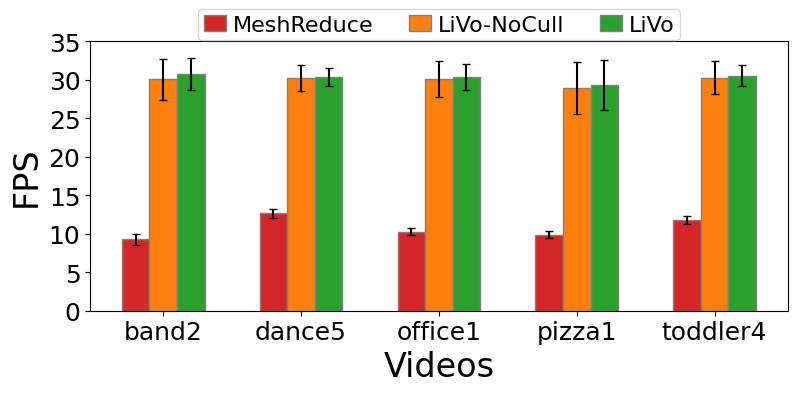

In [52]:
# Tracep1

fig, ax = plt.subplots(1, 1, figsize=figsize)

bar_width = 0.2
r1 = np.arange(len(seq_names_short))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

mm_type_short = "tracep1"

mean_meshreduce = [
    meshreduce_fps_mm_dict[seq_name_short + "_" + mm_type_short]["mean_fps_meshreduce"]
    for seq_name_short in seq_names_short
]

std_meshreduce = [
    meshreduce_fps_mm_dict[seq_name_short + "_" + mm_type_short]["std_fps_meshreduce"]
    for seq_name_short in seq_names_short
]

mean_livo_nocull = [
    livo_nocull_fps_mm_dict[seq_name_short + "_" + mm_type_short][
        "mean_fps_livo_nocull"
    ]
    for seq_name_short in seq_names_short
]

std_livo_nocull = [
    livo_nocull_fps_mm_dict[seq_name_short + "_" + mm_type_short]["std_fps_livo_nocull"]
    for seq_name_short in seq_names_short
]

mean_livo = [
    livo_fps_mm_dict[seq_name_short + "_" + mm_type_short]["mean_fps_livo"]
    for seq_name_short in seq_names_short
]

std_livo = [
    livo_fps_mm_dict[seq_name_short + "_" + mm_type_short]["std_fps_livo"]
    for seq_name_short in seq_names_short
]

# for i in range(len(mean_livo)):
#     if mean_livo[i] > 30:
#         mean_livo[i] = 30

# for i in range(len(mean_livo_nocull)):
#     if mean_livo_nocull[i] > 30:
#         mean_livo_nocull[i] = 30

ax.bar(
    r1,
    mean_meshreduce,
    yerr=std_meshreduce,
    color=colors[1],
    width=bar_width,
    capsize=3,
    edgecolor="grey",
    label="MeshReduce",
)

ax.bar(
    r2,
    mean_livo_nocull,
    yerr=std_livo_nocull,
    color=colors[2],
    width=bar_width,
    capsize=3,
    edgecolor="grey",
    label="LiVo-NoCull",
)
ax.bar(
    r3,
    mean_livo,
    yerr=std_livo,
    color=colors[3],
    width=bar_width,
    capsize=3,
    edgecolor="grey",
    label="LiVo",
)

ax.set_xticks([r + bar_width for r in range(len(seq_names_short))])
ax.set_xticklabels(seq_names_short, fontsize=xytick_font)
ax.set_yticklabels(np.arange(0, 36, 5), fontsize=xytick_font)
ax.set_ylim(0, 35)
ax.set_ylabel("FPS", fontsize=xylabel_font)
ax.set_xlabel("Videos", fontsize=xylabel_font)
legend = plt.legend(
    loc="upper center",
    handlelength=1,
    handletextpad=0.3,
    columnspacing=1.6,
    ncol=4,
    bbox_to_anchor=(0.5, 1.16),
    fontsize=legend_font,
    borderpad=0.25,
)

plt.show()

# save figure to pdf
fig.savefig(
    os.path.join(output_dir, f"fps_{mm_type_short}.pdf"),
    bbox_inches="tight",
)

/tmp/ipykernel_1962898/675724586.py:86: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(np.arange(0, 36, 5), fontsize=xytick_font)


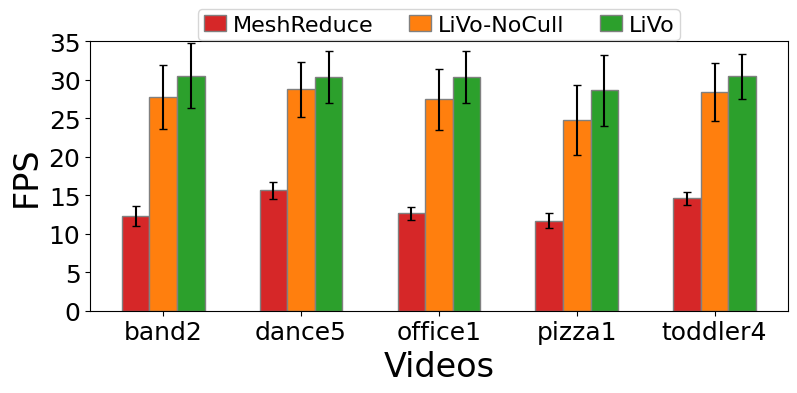

In [53]:
# Wifi-25

fig, ax = plt.subplots(1, 1, figsize=figsize)

bar_width = 0.2
r1 = np.arange(len(seq_names_short))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

mm_type_short = "wifi-25"

mean_meshreduce = [
    meshreduce_fps_mm_dict[seq_name_short + "_" + mm_type_short]["mean_fps_meshreduce"]
    for seq_name_short in seq_names_short
]

std_meshreduce = [
    meshreduce_fps_mm_dict[seq_name_short + "_" + mm_type_short]["std_fps_meshreduce"]
    for seq_name_short in seq_names_short
]

mean_livo_nocull = [
    livo_nocull_fps_mm_dict[seq_name_short + "_" + mm_type_short][
        "mean_fps_livo_nocull"
    ]
    for seq_name_short in seq_names_short
]

std_livo_nocull = [
    livo_nocull_fps_mm_dict[seq_name_short + "_" + mm_type_short]["std_fps_livo_nocull"]
    for seq_name_short in seq_names_short
]

mean_livo = [
    livo_fps_mm_dict[seq_name_short + "_" + mm_type_short]["mean_fps_livo"]
    for seq_name_short in seq_names_short
]

std_livo = [
    livo_fps_mm_dict[seq_name_short + "_" + mm_type_short]["std_fps_livo"]
    for seq_name_short in seq_names_short
]

# for i in range(len(mean_livo)):
#     if mean_livo[i] > 30:
#         mean_livo[i] = 30

# for i in range(len(mean_livo_nocull)):
#     if mean_livo_nocull[i] > 30:
#         mean_livo_nocull[i] = 30

ax.bar(
    r1,
    mean_meshreduce,
    yerr=std_meshreduce,
    color=colors[1],
    width=bar_width,
    capsize=3,
    edgecolor="grey",
    label="MeshReduce",
)

ax.bar(
    r2,
    mean_livo_nocull,
    yerr=std_livo_nocull,
    color=colors[2],
    width=bar_width,
    capsize=3,
    edgecolor="grey",
    label="LiVo-NoCull",
)
ax.bar(
    r3,
    mean_livo,
    yerr=std_livo,
    color=colors[3],
    width=bar_width,
    capsize=3,
    edgecolor="grey",
    label="LiVo",
)

ax.set_xticks([r + bar_width for r in range(len(seq_names))])
ax.set_xticklabels(seq_names_short, fontsize=xytick_font)
ax.set_yticklabels(np.arange(0, 36, 5), fontsize=xytick_font)
ax.set_ylim(0, 35)
ax.set_ylabel("FPS", fontsize=xylabel_font)
ax.set_xlabel("Videos", fontsize=xylabel_font)
legend = plt.legend(
    loc="upper center",
    handlelength=1,
    handletextpad=0.3,
    columnspacing=1.6,
    ncol=4,
    bbox_to_anchor=(0.5, 1.16),
    fontsize=legend_font,
    borderpad=0.25,
)

plt.show()

# save figure to pdf
fig.savefig(
    os.path.join(output_dir, f"fps_{mm_type_short}.pdf"),
    bbox_inches="tight",
)

/tmp/ipykernel_1962898/1362704070.py:79: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(np.arange(0, 36, 5), fontsize=xytick_font)


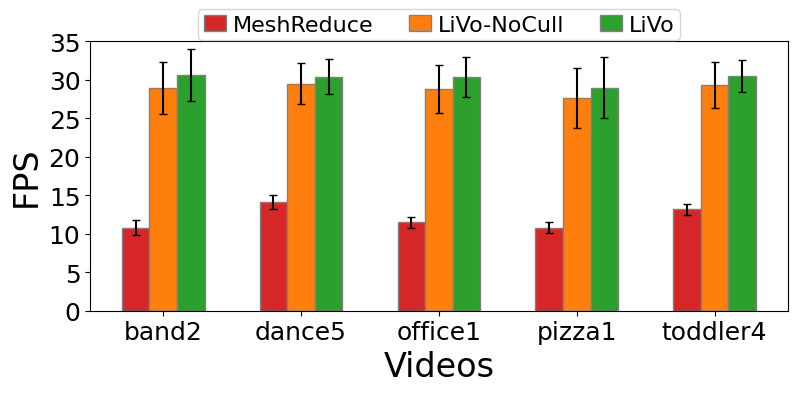

In [54]:
# Combined
fig, ax = plt.subplots(1, 1, figsize=figsize)

bar_width = 0.2
r1 = np.arange(len(seq_names_short))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

mean_meshreduce = [
    meshreduce_fps_dict[seq_name_short]["mean_fps_meshreduce"]
    for seq_name_short in seq_names_short
]

std_meshreduce = [
    meshreduce_fps_dict[seq_name_short]["std_fps_meshreduce"]
    for seq_name_short in seq_names_short
]

mean_livo_nocull = [
    livo_nocull_fps_dict[seq_name_short]["mean_fps_livo_nocull"]
    for seq_name_short in seq_names_short
]

std_livo_nocull = [
    livo_nocull_fps_dict[seq_name_short]["std_fps_livo_nocull"]
    for seq_name_short in seq_names_short
]

mean_livo = [
    livo_fps_dict[seq_name_short]["mean_fps_livo"] for seq_name_short in seq_names_short
]

std_livo = [
    livo_fps_dict[seq_name_short]["std_fps_livo"] for seq_name_short in seq_names_short
]

# for i in range(len(mean_livo)):
#     if mean_livo[i] > 30:
#         mean_livo[i] = 30

# for i in range(len(mean_livo_nocull)):
#     if mean_livo_nocull[i] > 30:
#         mean_livo_nocull[i] = 30

ax.bar(
    r1,
    mean_meshreduce,
    yerr=std_meshreduce,
    color=colors[1],
    width=bar_width,
    capsize=3,
    edgecolor="grey",
    label="MeshReduce",
)

ax.bar(
    r2,
    mean_livo_nocull,
    yerr=std_livo_nocull,
    color=colors[2],
    width=bar_width,
    capsize=3,
    edgecolor="grey",
    label="LiVo-NoCull",
)
ax.bar(
    r3,
    mean_livo,
    yerr=std_livo,
    color=colors[3],
    width=bar_width,
    capsize=3,
    edgecolor="grey",
    label="LiVo",
)

ax.set_xticks([r + bar_width for r in range(len(seq_names))])
ax.set_xticklabels(seq_names_short, fontsize=xytick_font)
ax.set_yticklabels(np.arange(0, 36, 5), fontsize=xytick_font)
ax.set_ylim(0, 35)
ax.set_ylabel("FPS", fontsize=xylabel_font)
ax.set_xlabel("Videos", fontsize=xylabel_font)
legend = plt.legend(
    loc="upper center",
    handlelength=1,
    handletextpad=0.3,
    columnspacing=1.6,
    ncol=4,
    bbox_to_anchor=(0.5, 1.16),
    fontsize=legend_font,
    borderpad=0.25,
)

plt.show()

# save figure to pdf
fig.savefig(
    os.path.join(output_dir, "fps.pdf"),
    bbox_inches="tight",
)